![gym](gym.png)


You are a product manager for a fitness studio and are interested in understanding the current demand for digital fitness classes. You plan to conduct a market analysis in Python to gauge demand and identify potential areas for growth of digital products and services.

### The Data

You are provided with a number of CSV files in the "Files/data" folder, which offer international and national-level data on Google Trends keyword searches related to fitness and related products. 

### workout.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'workout_worldwide'` | Index representing the popularity of the keyword 'workout', on a scale of 0 to 100. |

### three_keywords.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'home_workout_worldwide'` | Index representing the popularity of the keyword 'home workout', on a scale of 0 to 100. |
| `'gym_workout_worldwide'` | Index representing the popularity of the keyword 'gym workout', on a scale of 0 to 100. |
| `'home_gym_worldwide'` | Index representing the popularity of the keyword 'home gym', on a scale of 0 to 100. |

### workout_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'workout_2018_2023'` | Index representing the popularity of the keyword 'workout' during the 5 year period. |

### three_keywords_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'home_workout_2018_2023'` | Index representing the popularity of the keyword 'home workout' during the 5 year period. |
| `'gym_workout_2018_2023'` | Index representing the popularity of the keyword 'gym workout' during the 5 year period.  |
| `'home_gym_2018_2023'` | Index representing the popularity of the keyword 'home gym' during the 5 year period. |

In [121]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [122]:
workout_global = pd.read_csv("data/workout.csv")
workout_global.head()

,month,workout_worldwide
0,2018-03,59
1,2018-04,61
2,2018-05,57
3,2018-06,56
4,2018-07,51


### When was the global search for 'workout' at its peak? Save the year of peak interest as a string named year_str in the format "yyyy".?

In [123]:
workout_global.sort_values("workout_worldwide", ascending=False)[:1]['month'].str[:4]

25    2020
Name: month, dtype: object

<Figure size 2000x800 with 0 Axes>

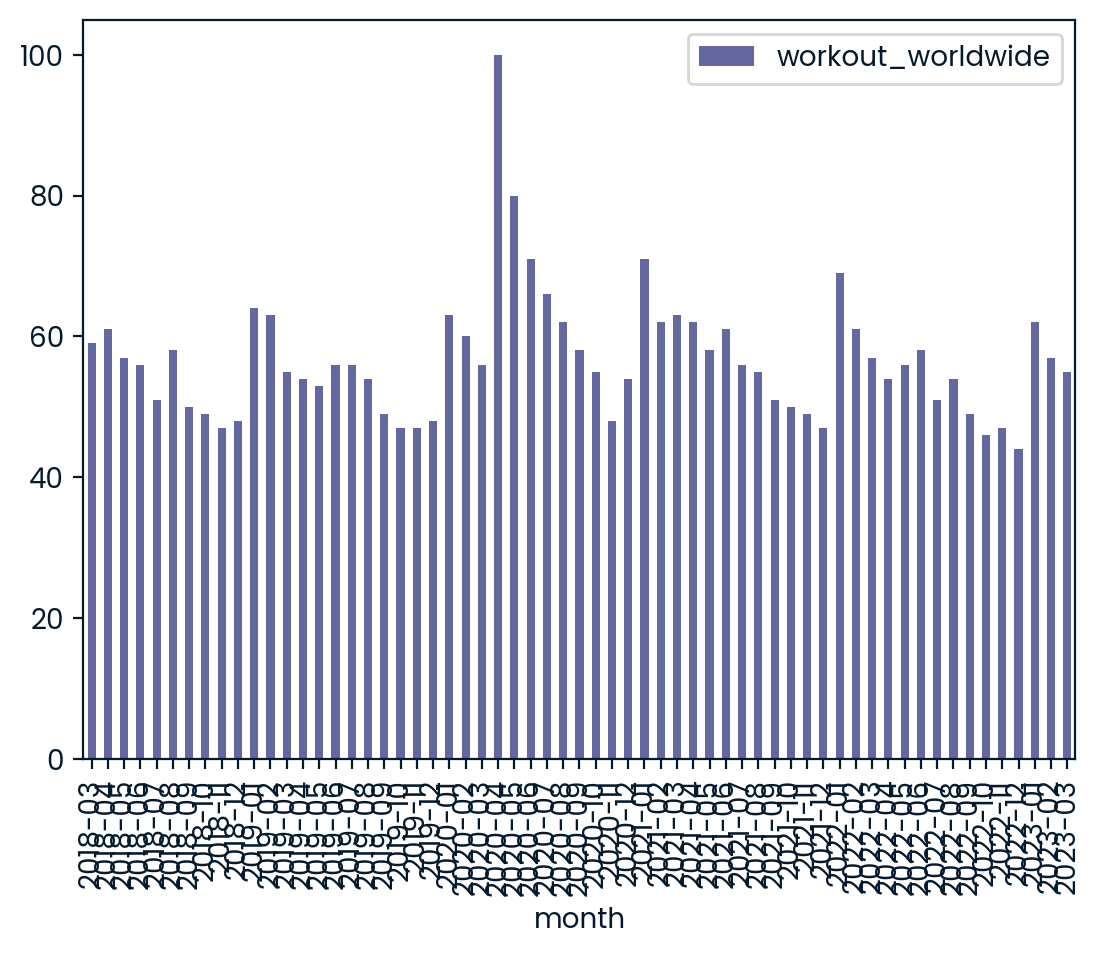

In [124]:
plt.figure(figsize=(20,8))
workout_global.plot(kind='bar', x='month', y='workout_worldwide')
plt.xticks(rotation=90)
plt.show()

In [125]:
year_str = '2020'
year_str

'2020'

### Of the keywords available, what was the most popular during the covid pandemic, and what is the most popular now? Save your answers as variables called peak_covid and current respectively.

In [126]:
df = pd.read_csv('data/three_keywords.csv')
df.head()

,month,home_workout_worldwide,gym_workout_worldwide,home_gym_worldwide
0,2018-03,12,16,10
1,2018-04,12,18,10
2,2018-05,13,16,9
3,2018-06,12,17,9
4,2018-07,12,17,9


<Figure size 2400x1000 with 0 Axes>

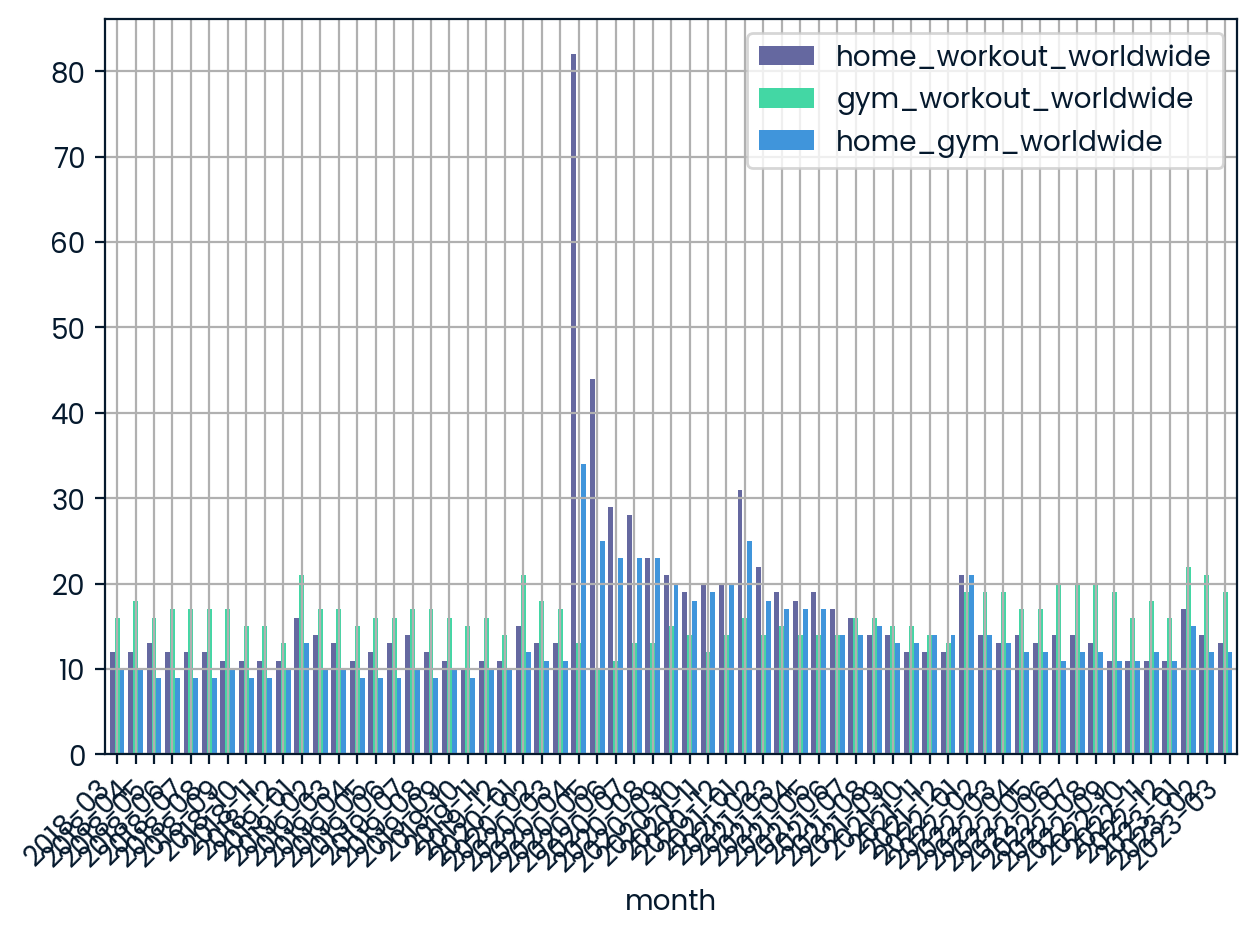

In [127]:
plt.figure(figsize=(24,10))
df.plot(kind='bar', x='month', y=['home_workout_worldwide', 'gym_workout_worldwide', 'home_gym_worldwide'],width=0.8,
        grid=True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Automatically adjust layout to avoid clipping

plt.show()

In [128]:
df[(df['month'] >= '2020-03') & (df['month'] <= '2021-12')][['home_workout_worldwide', 'gym_workout_worldwide', 'home_gym_worldwide']].max().idxmax

<bound method Series.idxmax of home_workout_worldwide    82
gym_workout_worldwide     17
home_gym_worldwide        34
dtype: int64>

In [129]:
df.sort_values(by='month')[-3:].max()

month                     2023-03
home_workout_worldwide         17
gym_workout_worldwide          22
home_gym_worldwide             15
dtype: object

In [130]:
peak_covid = 'home_workout_worldwide'
current = 'gym_workout_worldwide'

What country has the highest interest for workouts among the following: United States, Australia, or Japan? Save your answer as top_country?

In [131]:
df = pd.read_csv("data/three_keywords_geo.csv")
df.head()

,Country,home_workout_2018_2023,gym_workout_2018_2023,home_gym_2018_2023
0,Gibraltar,NaN,NaN,NaN
1,Lesotho,NaN,NaN,NaN
2,Guam,NaN,NaN,NaN
3,Botswana,NaN,NaN,NaN
4,Brunei,NaN,NaN,NaN


In [132]:
ts = df[df['Country'].isin(['United States', 'Australia', 'Japan'])]
ts.max()

Country                   United States
home_workout_2018_2023             36.0
gym_workout_2018_2023              37.0
home_gym_2018_2023                 37.0
dtype: object

<Figure size 2000x700 with 0 Axes>

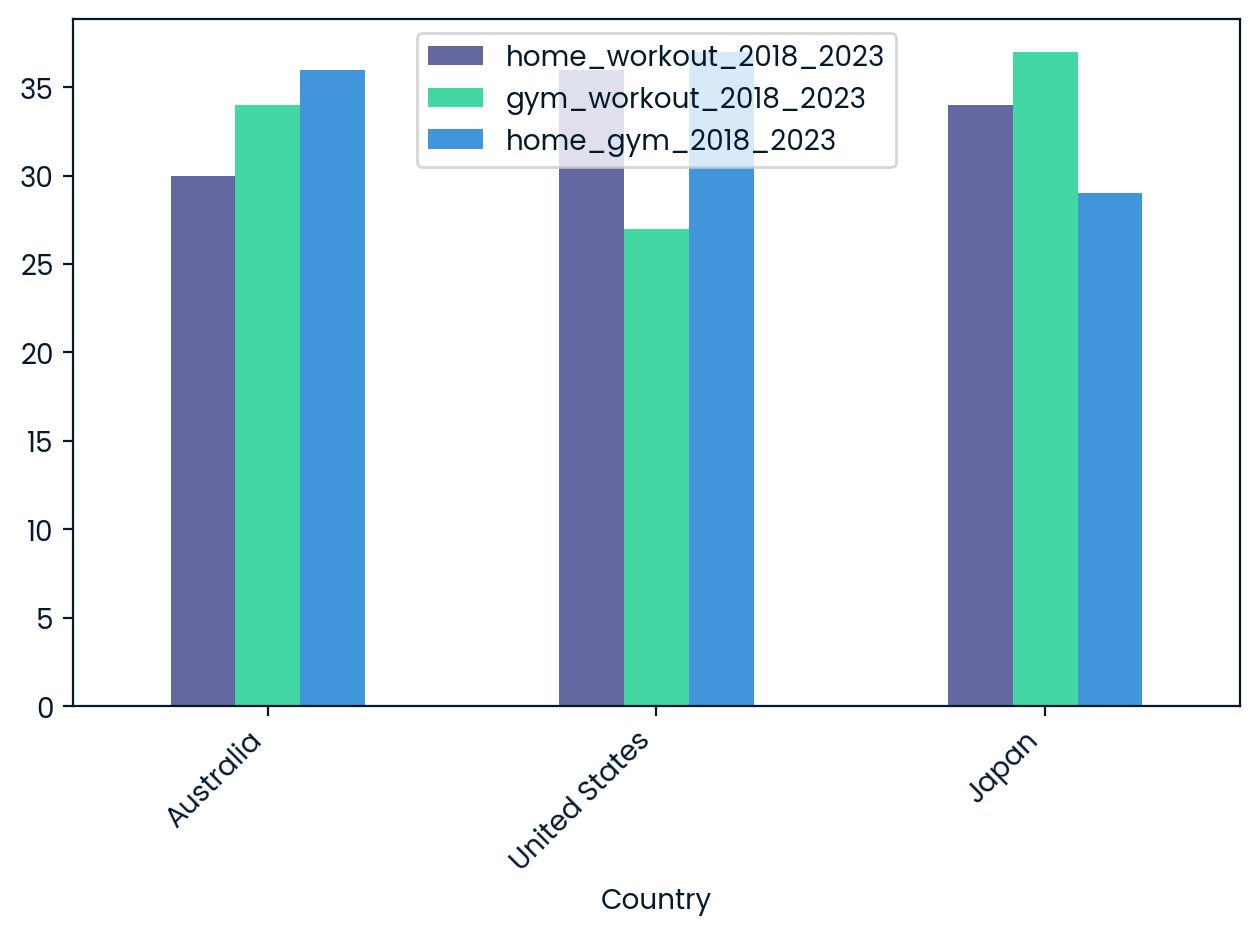

In [133]:
plt.figure(figsize=(20,7))
ts.plot(kind='bar', x='Country', y=['home_workout_2018_2023', 'gym_workout_2018_2023', 'home_gym_2018_2023'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [134]:
top_country = 'United States'

You'd be interested in expanding your virtual home workouts offering to either the Philippines or Malaysia. Which of the two countries has the highest interest in home workouts?

In [135]:
home_workout_geo = df[df['Country'].isin(['Philippines', 'Malaysia'])].set_index('Country')['home_workout_2018_2023'].idxmax()
home_workout_geo

'Philippines'